In [107]:
import pandas as pd
import numpy as np
from IVClassification import *
import wooldridge as woo
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [108]:
mroz = woo.dataWoo('mroz')
mroz.describe()

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,428.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.00000,753.000000,428.000000,753.000000
mean,0.568393,740.576361,0.237716,1.353254,42.537849,12.286853,4.177682,1.849734,2267.270916,45.120850,...,23080.594954,0.678863,9.250996,8.808765,8.623506,0.642762,10.63081,20.128964,1.190173,178.038513
std,0.495630,871.314216,0.523959,1.319874,8.072574,2.280246,3.310282,2.419887,595.566649,8.058793,...,12190.202026,0.083496,3.367468,3.572290,3.114934,0.479504,8.06913,11.634797,0.723198,249.630849
min,0.000000,0.000000,0.000000,0.000000,30.000000,5.000000,0.128200,0.000000,175.000000,30.000000,...,1500.000000,0.441500,0.000000,0.000000,3.000000,0.000000,0.00000,-0.029057,-2.054164,0.000000
25%,0.000000,0.000000,0.000000,0.000000,36.000000,12.000000,2.262600,0.000000,1928.000000,38.000000,...,15428.000000,0.621500,7.000000,7.000000,7.500000,0.000000,4.00000,13.025040,0.816509,16.000000
50%,1.000000,288.000000,0.000000,1.000000,43.000000,12.000000,3.481900,0.000000,2164.000000,46.000000,...,20880.000000,0.691500,10.000000,7.000000,7.500000,1.000000,9.00000,17.700001,1.247574,81.000000
75%,1.000000,1516.000000,0.000000,2.000000,49.000000,13.000000,4.970750,3.580000,2553.000000,52.000000,...,28200.000000,0.721500,12.000000,12.000000,11.000000,1.000000,15.00000,24.466000,1.603571,225.000000
max,1.000000,4950.000000,3.000000,8.000000,60.000000,17.000000,25.000000,9.980000,5010.000000,60.000000,...,96000.000000,0.941500,17.000000,17.000000,14.000000,1.000000,45.00000,96.000000,3.218876,2025.000000


In [109]:
mroz.isna().sum()

inlf          0
hours         0
kidslt6       0
kidsge6       0
age           0
educ          0
wage        325
repwage       0
hushrs        0
husage        0
huseduc       0
huswage       0
faminc        0
mtr           0
motheduc      0
fatheduc      0
unem          0
city          0
exper         0
nwifeinc      0
lwage       325
expersq       0
dtype: int64

In [110]:
mroz

,inlf,hours,kidslt6,kidsge6,age,educ,wage,repwage,hushrs,husage,...,faminc,mtr,motheduc,fatheduc,unem,city,exper,nwifeinc,lwage,expersq
0,1,1610,1,0,32,12,3.3540,2.65,2708,34,...,16310.0,0.7215,12,7,5.0,0,14,10.910060,1.210154,196
1,1,1656,0,2,30,12,1.3889,2.65,2310,30,...,21800.0,0.6615,7,7,11.0,1,5,19.499981,0.328512,25
2,1,1980,1,3,35,12,4.5455,4.04,3072,40,...,21040.0,0.6915,12,7,5.0,0,15,12.039910,1.514138,225
3,1,456,0,3,34,12,1.0965,3.25,1920,53,...,7300.0,0.7815,7,7,5.0,0,6,6.799996,0.092123,36
4,1,1568,1,2,31,14,4.5918,3.60,2000,32,...,27300.0,0.6215,12,14,9.5,1,7,20.100058,1.524272,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,0,0,0,2,40,13,NaN,0.00,3020,43,...,28200.0,0.6215,10,10,9.5,1,5,28.200001,NaN,25
749,0,0,2,3,31,12,NaN,0.00,2056,33,...,10000.0,0.7715,12,12,7.5,0,14,10.000000,NaN,196
750,0,0,0,0,43,12,NaN,0.00,2383,43,...,9952.0,0.7515,10,3,7.5,0,4,9.952000,NaN,16
751,0,0,0,0,60,12,NaN,0.00,1705,55,...,24984.0,0.6215,12,12,14.0,1,15,24.983999,NaN,225


We are interested in the causal effect of education on inlf (in labor force or not)

X: educ

Y: inlf

Z: motheduc, fatheduc

U: age, faminc, huseduc, unem, city

V: kidslt6, kidsge6, hushrs, husage, huswage, mtr

In [111]:
# Select instrumental variables and covariates

X = mroz[['educ']]
Z = mroz[['motheduc', 'fatheduc']]
W = None
Y = mroz[['inlf']]

# Measured Concounders: age, faminc, city
covar = ['age', 'faminc','huseduc', 'unem', 'city', 'kidslt6', 'kidsge6', 'hushrs', 'husage','huswage', 'mtr']

V = mroz[covar]

scaler = StandardScaler()
V = scaler.fit_transform(V)
V = pd.DataFrame(V, columns=covar)
X = scaler.fit_transform(X)
X = pd.DataFrame(X.reshape(-1, 1), columns=['educ'])
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z, columns=['motheduc', 'fatheduc'])

,OLG,TSLS,GMM,ResIV
intercept,0.323089,0.312263,0.317975,0.323205
educ,0.402277,0.182848,0.233326,0.273826
kidslt6,-0.717880,-0.681144,-0.704340,-0.716835
kidsge6,-0.053512,-0.073748,-0.062968,-0.055019
age,-0.366426,-0.362061,-0.381426,-0.383594
husage,-0.158095,-0.188585,-0.167316,-0.156199
huswage,-0.849089,-0.840899,-0.866993,-0.850668
faminc,0.118784,0.134602,0.116048,0.117311
mtr,-0.691830,-0.799124,-0.772828,-0.699611
city,0.004584,0.028542,0.020816,0.009570


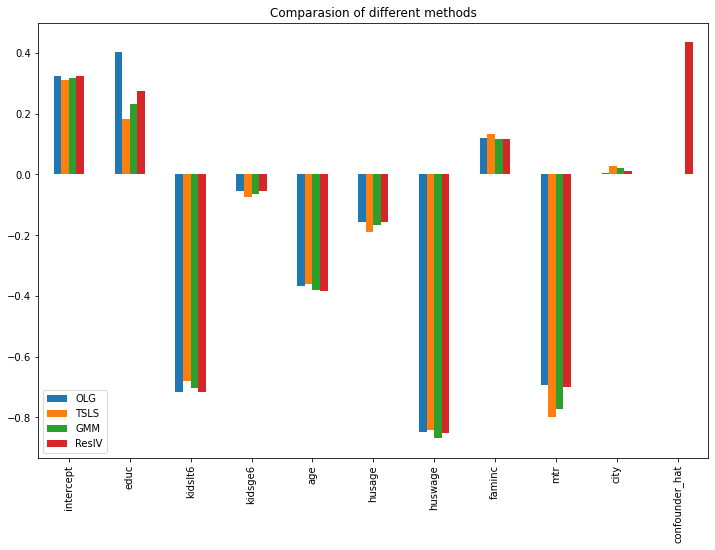

In [112]:
Var_names = ['intercept','educ', 'confounder_hat']
Var_names.extend(V.columns)

resiv = ResIV()
resiv.fit(X, Y, Z, V)
resiv_result = pd.DataFrame(resiv.coef, columns=Var_names)

lg = LogisticRegression()
lg.fit(np.concatenate([X, V], axis=1), np.array(Y).ravel())

Var_names = ['intercept', 'educ']
Var_names.extend(V.columns)

results = np.concatenate((lg.intercept_.reshape(1, -1), lg.coef_.reshape(1, -1)), axis=1)
OLG_result = pd.DataFrame(results, columns=Var_names)

tsls = Multivar_TSLS()
tsls.fit(X, Y, Z, V)
tsls_result = pd.DataFrame(tsls.coef, columns=Var_names)

GMM = Multivar_GMM()
GMM.fit(X, Y, Z, V)
GMM_result = pd.DataFrame(GMM.coef.reshape(1, -1), columns=Var_names)

# Merge all results
comparasion = pd.concat([OLG_result.T, tsls_result.T, GMM_result.T, resiv_result.T], axis=1)
comparasion.columns = ['OLG', 'TSLS', 'GMM', 'ResIV']
comparasion.plot(kind='bar', figsize = (12, 8),title='Comparasion of different methods')
comparasion

In [113]:
X = mroz[['educ']]
Z = mroz[['motheduc', 'fatheduc']]
# W = mroz['faminc']
W = None
Y = mroz[['inlf']]
# V = mroz[['kidslt6', 'kidsge6', 'age', 'hushrs', 'husage', 'huseduc', 'huswage', 'mtr', 'city', 'exper']]
# Remove confounders: age, huseduc, city, faminc
covar = ['kidslt6', 'kidsge6', 'age', 'husage', 'huswage', 'faminc', 'mtr','city']

covar = ['kidslt6', 'kidsge6', 'huswage', 'mtr', ]
V = mroz[covar]

scaler = StandardScaler()
V = scaler.fit_transform(V)
V = pd.DataFrame(V, columns=covar)
X = scaler.fit_transform(X)
X = pd.DataFrame(X.reshape(-1, 1), columns=['educ'])
Z = scaler.fit_transform(Z)
Z = pd.DataFrame(Z, columns=['motheduc', 'fatheduc'])

,OLG,TSLS,GMM,ResIV
intercept,0.311055,0.296171,0.313150,0.310827
educ,0.449652,0.358814,0.467630,0.449329
kidslt6,-0.483147,-0.441239,-0.489465,-0.482619
kidsge6,0.147556,0.134372,0.152427,0.147343
huswage,-0.854438,-0.835024,-0.885101,-0.853958
mtr,-0.777431,-0.895125,-0.800629,-0.778332
confounder_hat,NaN,NaN,NaN,0.444705


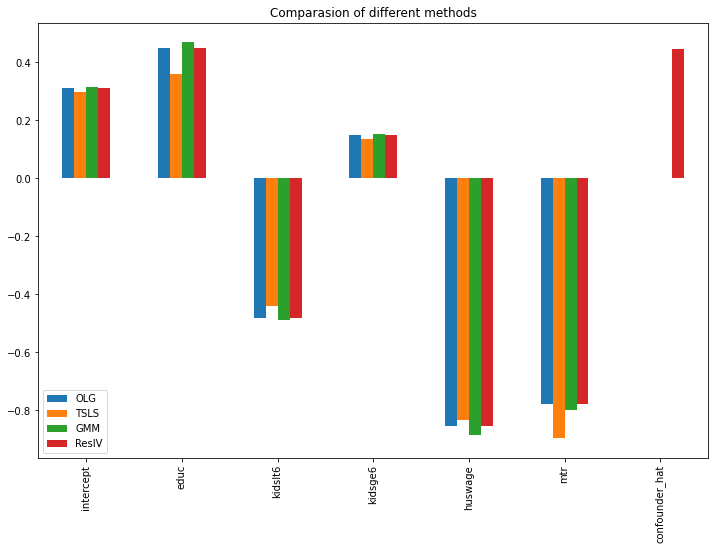

In [114]:
Var_names = ['intercept','educ', 'confounder_hat']
Var_names.extend(V.columns)

resiv = ResIV()
resiv.fit(X, Y, Z, V)
resiv_result = pd.DataFrame(resiv.coef, columns=Var_names)

lg = LogisticRegression()
lg.fit(np.concatenate([X, V], axis=1), np.array(Y).ravel())

Var_names = ['intercept', 'educ']
Var_names.extend(V.columns)

results = np.concatenate((lg.intercept_.reshape(1, -1), lg.coef_.reshape(1, -1)), axis=1)
OLG_result = pd.DataFrame(results, columns=Var_names)

tsls = Multivar_TSLS()
tsls.fit(X, Y, Z, V)
tsls_result = pd.DataFrame(tsls.coef, columns=Var_names)

GMM = Multivar_GMM()
GMM.fit(X, Y, Z, V)
GMM_result = pd.DataFrame(GMM.coef.reshape(1, -1), columns=Var_names)

# Merge all results
comparasion = pd.concat([OLG_result.T, tsls_result.T, GMM_result.T, resiv_result.T], axis=1)
comparasion.columns = ['OLG', 'TSLS', 'GMM', 'ResIV']
comparasion.plot(kind='bar', figsize = (12, 8),title='Comparasion of different methods')
comparasion